# Projeto Dados Netflix

# Descrição

Este conjunto de dados contém informações sobre filmes e séries disponíveis na Netflix, incluindo títulos, elenco, classificação etária, duração, gênero, país, descricão. A tabela de dados tem como objetivo fornecer uma visão geral de diversos filmes organizados por várias colunas descritivas.

# Estrutura dos Dados
### Variáveis

- **id**: Um identificador único para cada filme ou série.
- **type** (tipo): O tipo de conteúdo, como "Movie" ou "TV Show".
- **name** (nome): O nome do filme ou série.
- **creator** (criador): O criador ou diretor do filme ou série (não fornecido em alguns registros).
- **starring** (ator): Atores principais que estrelaram o filme ou série.
- **year** (ano): O ano de lançamento.
- **rating** (classificação etária): A classificação etária, como " TV-Y", "TV-Y7", "TV-G", "TV-PG","TV-14","TV-MA". 
- **time** (tempo): A duração do filme em minutos ou a duração do episódio de uma série de TV.
- **genres** (gênero): Gêneros aos quais o filme ou série pertence, como Drama, Ação, Comédia, entre outros.
- **country** (pais): O país de origem do filme ou série.
- **describle** (descricao): Uma breve sinopse ou descrição do enredo.

# Observação

### Classificação Etária

- **TV-Y** (Aprovado para todas as idades): Conteúdo apropriado para crianças, sem nada que possa assustar ou perturbar.

- **TV-Y7** (Aprovado para crianças a partir de 7 anos): Conteúdo adequado para crianças a partir dessa idade, podendo incluir temas levemente mais complexos.

- **TV-G** (Aprovado para todas as idades): Sem conteúdo que possa ser considerado ofensivo; ideal para toda a família.

- **TV-PG** (Orientação dos pais sugerida): Pode incluir algum material que os pais possam achar inapropriado para crianças, portanto, é recomendado que os responsáveis assistam junto.

- **TV-14** (Inadequado para menores de 14 anos): Conteúdo que pode ser inadequado para crianças e pré-adolescentes; é recomendável a supervisão dos pais.

- **TV-MA** (Público adulto): Conteúdo destinado a adultos, com temas mais complexos, linguagem forte, e/ou violência; não é recomendado para menores de 17 anos.


# Objetivo

### Predição da Popularidade de Filmes e Séries da Netflix


# Importing Packages

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import graphviz
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc, precision_score, recall_score, f1_score

# Carregando os dados

In [2]:
# armazenamento do DataFrame
data_netflix = pd.read_csv('../input/dadosnetflix/netflix_full.csv')

In [3]:
# Mostra as primeiras 5 linhas do DataFrame
data_netflix.head()

,id,type,name,creator,starring,year,rating,time,genres,country,describle
0,81416533,Movie,Heart of Stone,NaN,"Gal Gadot, Jamie Dornan, Alia Bhatt",2023,TV-PG,125 min,"Drama Movies ,Action & Adventure Movies ,Spy M...",United States,An intelligence operative for a shadowy global...
1,80991406,Movie,Johnny English Strikes Again,NaN,"Rowan Atkinson, Ben Miller, Emma Thompson",2018,TV-PG,88 min,"Family Movies ,Comedy Movies ,Action & Adventu...",United States,After a cyberattack exposes every undercover a...
2,81644420,Movie,Hunt,NaN,"Lee Jung-jae, Jung Woo-sung, Jeon Hye-jin",2022,TV-14,125 min,"Drama Movies ,Action & Adventure Movies ,Spy M...",South Korea,As a pair of national security agents hunt a N...
3,70208104,Movie,Safe House,NaN,"Denzel Washington, Ryan Reynolds, Vera Farmiga",2012,TV-14,114 min,"Action & Adventure Movies ,Spy Movies",United States,CIA operative Matt Weston must get a dangerous...
4,70297761,Movie,Commitment,NaN,"Choi Seung-hyun, Han Ye-ri, Yoon Je-moon",2013,TV-14,112 min,"Action & Adventure Movies ,Spy Movies",South Korea,After taking on a spying mission to free his s...


In [4]:
# fornece uma visão geral da estrutura de dados
data_netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3256 entries, 0 to 3255
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         3256 non-null   int64 
 1   type       3256 non-null   object
 2   name       3256 non-null   object
 3   creator    713 non-null    object
 4   starring   3256 non-null   object
 5   year       3256 non-null   int64 
 6   rating     3256 non-null   object
 7   time       3256 non-null   object
 8   genres     3255 non-null   object
 9   country    2974 non-null   object
 10  describle  3256 non-null   object
dtypes: int64(2), object(9)
memory usage: 279.9+ KB


In [5]:
# Retorna a contagem de valores nulos (ou ausentes)
data_netflix.isnull().sum()

id              0
type            0
name            0
creator      2543
starring        0
year            0
rating          0
time            0
genres          1
country       282
describle       0
dtype: int64

In [6]:
# Gera estatísticas descritivas sobre as colunas numéricas do DataFrame
data_netflix.describe()

,id,year
count,3.256000e+03,3256.000000
mean,8.063665e+07,2019.364865
std,1.936469e+06,2.704297
min,7.004527e+07,2012.000000
25%,8.021615e+07,2018.000000
50%,8.112197e+07,2020.000000
75%,8.141198e+07,2022.000000
max,8.171850e+07,2023.000000


In [7]:
# Mostra a forma do DataFrame, ou seja, a quantidade de linhas e colunas
print("Data Shape:",data_netflix.shape)

Data Shape: (3256, 11)


In [8]:
# cria uma cópia do DataFrame
data_netflix_copy = data_netflix.copy()

# Gráfico para 10 gêneros mais populares

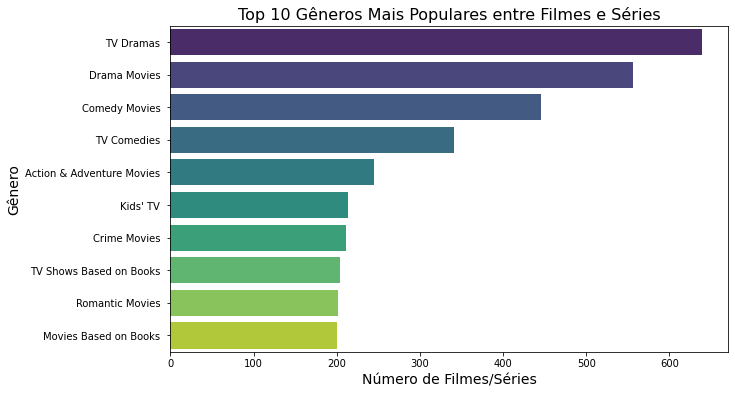

In [9]:
genero_mapeamento = {
    'Action & Adventure': 'Action',
    'Sci-Fi & Fantasy': 'Science Fiction',
    'Children & Family': 'Family',
}

data_netflix_copy['genres'] = data_netflix_copy['genres'].str.split(',')
data_netflix_exploded = data_netflix_copy.explode('genres')
data_netflix_exploded['genres'] = data_netflix_exploded['genres'].replace(genero_mapeamento)

genero_contagem = data_netflix_exploded['genres'].value_counts().head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=genero_contagem.values, y=genero_contagem.index, palette='viridis')
plt.title('Top 10 Gêneros Mais Populares entre Filmes e Séries', fontsize=16)
plt.xlabel('Número de Filmes/Séries', fontsize=14)
plt.ylabel('Gênero', fontsize=14)
plt.show()

# Gráfico para popularidade por classificação etária

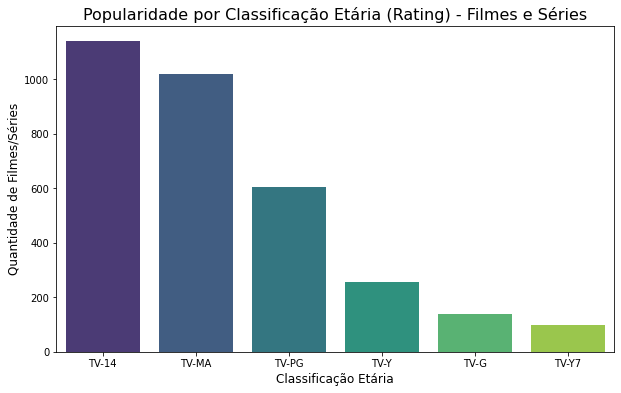

In [10]:
rating_count = data_netflix_copy['rating'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=rating_count.index, y=rating_count.values, palette='viridis')
plt.title('Popularidade por Classificação Etária (Rating) - Filmes e Séries', fontsize=16)
plt.xlabel('Classificação Etária', fontsize=12)
plt.ylabel('Quantidade de Filmes/Séries', fontsize=12)
plt.show()

# Gráfico do número de lançamentos por ano entre filmes e séries

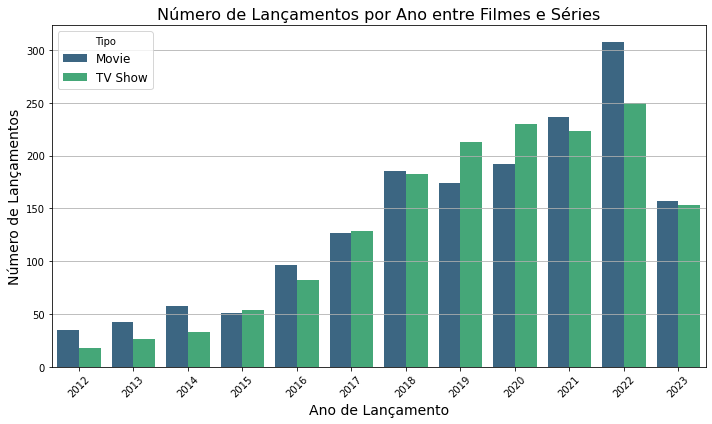

In [11]:
release_year_count = data_netflix_copy.groupby(['year', 'type']).size().reset_index(name='count')

plt.figure(figsize=(10, 6))
sns.barplot(data=release_year_count, x='year', y='count', hue='type', palette='viridis')
plt.title('Número de Lançamentos por Ano entre Filmes e Séries', fontsize=16)
plt.xlabel('Ano de Lançamento', fontsize=14)
plt.ylabel('Número de Lançamentos', fontsize=14)
plt.xticks(rotation=45)
plt.legend(title='Tipo', fontsize=12)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


# Introdução à Predição de Filmes e Séries

A predição de filmes e séries envolve o uso de técnicas de aprendizado de máquina para identificar padrões nos dados históricos e fornecer insights valiosos sobre o conteúdo futuro. Este projeto de predição tem como objetivo analisar e prever diferentes características de filmes e séries, utilizando um conjunto de variáveis que abrange diversos aspectos desses conteúdos.

O projeto busca identificar padrões em variáveis como **genres** (gênero), **time** (duração), **rating** (classificação etária), e **year** (ano de lançamento)

# Pré-Processamento de Dados

In [12]:
# Remoção de Valores Nulos
data_netflix_copy.dropna(subset=['genres', 'rating', 'time'], inplace=True)

# Conversão de Tempo para Minutos
data_netflix_copy['time'] = data_netflix_copy['time'].apply(lambda time_str: int(time_str.split(' ')[0]) * 30 if 'Season' in time_str else int(time_str.split(' ')[0]) if 'min' in time_str else np.nan)

# Remoção de valores nulos em 'time' após a conversão
data_netflix_copy.dropna(subset=['time'], inplace=True) 

#Criação da Coluna 'popular'
data_netflix_copy['popular'] = data_netflix_copy['rating'].apply(lambda rating: 1 if rating in ['TV-MA', 'TV-14'] else 0)

# Mapeamento das Classificações 'rating'
rating_mapping = {
    'TV-Y': 0,
    'TV-Y7': 1,
    'TV-G': 2,
    'TV-PG': 3,
    'TV-14': 4,
    'TV-MA': 5
}
data_netflix_copy['rating'] = data_netflix_copy['rating'].map(rating_mapping)

# Codificação de Gêneros
le = LabelEncoder()
data_netflix_copy['genres'] = le.fit_transform(data_netflix_copy['genres'].apply(lambda x: '|'.join(x)))

# Seleção das Variáveis Previsoras e da Variável-Alvo
X = data_netflix_copy[['genres', 'year', 'time', 'rating']]
y = data_netflix_copy['popular']

# Divisão de Dados e Verificação de NaNs
if X.isnull().values.any() or y.isnull().values.any():
    print("Ainda existem valores NaN nos dados!")

# Divisão em Conjunto de Treinamento e Conjunto de Teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Adição de Ruído aos Dados de Treinamento e Teste
noise_factor = 1.0
np.random.seed(42)
X_train_noisy = X_train + noise_factor * np.random.normal(size=X_train.shape)
X_test_noisy = X_test + noise_factor * np.random.normal(size=X_test.shape)


# Regressão Logística

Acurácia da Regressão Logística: 0.83
Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.75      0.67      0.71       200
           1       0.86      0.90      0.88       443

    accuracy                           0.83       643
   macro avg       0.81      0.79      0.79       643
weighted avg       0.83      0.83      0.83       643



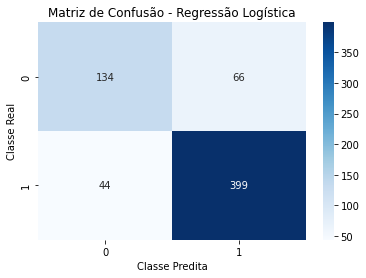

In [13]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_noisy)
X_test_scaled = scaler.transform(X_test_noisy)

logistic_model = LogisticRegression(random_state=42, C=0.1)
logistic_model.fit(X_train_scaled, y_train)

y_pred = logistic_model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)

print(f'Acurácia da Regressão Logística: {accuracy:.2f}')
print("Relatório de Classificação:\n", classification_report(y_test, y_pred))

conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title('Matriz de Confusão - Regressão Logística')
plt.ylabel('Classe Real')
plt.xlabel('Classe Predita')
plt.show()

# Explicação do Resultado da Regressão Logística

##### O modelo de **Regressão Logística** alcançou uma acurácia de 83%, indicando que conseguiu classificar corretamente 83% dos exemplos no conjunto de teste.

- **Precisão**: Para a classe 0, a precisão foi de 75%, enquanto para a classe 1, foi de 86%. Isso significa que, entre as previsões da classe 0, 75% estavam corretas, e para a classe 1, 86% estavam corretas. A precisão mais alta para a classe 1 indica que o modelo possui maior eficácia em prever corretamente essa classe.

- **Recall**: O modelo identificou corretamente 67% das instâncias da classe 0 e 90% das instâncias da classe 1. Esse alto recall para a classe 1 sugere uma maior sensibilidade na detecção dessa classe, o que pode ser positivo em contextos onde minimizar falsos negativos da classe 1 seja prioritário.

- **F1-Score**: O equilíbrio entre precisão e recall foi de 0.71 para a classe 0 e de 0.88 para a classe 1. Isso indica que o modelo apresenta um desempenho mais consistente para a classe 1, tanto em termos de precisão quanto de recall combinados, mas ainda pode melhorar na identificação da classe 0.

- **Matriz de Confusão**: A matriz de confusão indica que o modelo tem uma tendência a classificar instâncias como classe 1, resultando em alguns falsos negativos na classe 0. Apesar disso, o modelo é robusto para identificar corretamente a classe 1, demonstrando um bom desempenho geral. A análise sugere que, embora a classe 1 seja bem capturada, o modelo pode ser aprimorado para melhorar a detecção da classe 0.

# Random Forest

Matriz de Confusão:
 [[137  63]
 [ 45 398]]
Acurácia da Random Forest: 0.83
Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.75      0.69      0.72       200
           1       0.86      0.90      0.88       443

    accuracy                           0.83       643
   macro avg       0.81      0.79      0.80       643
weighted avg       0.83      0.83      0.83       643



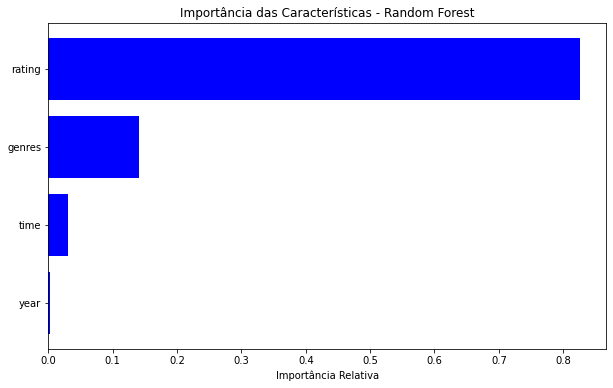

In [14]:
rf_model = RandomForestClassifier(n_estimators=20, max_depth=3, random_state=42)
rf_model.fit(X_train_noisy, y_train)

y_pred = rf_model.predict(X_test_noisy)

conf_matrix = confusion_matrix(y_test, y_pred)
print("Matriz de Confusão:\n", conf_matrix)

accuracy_rf = accuracy_score(y_test, y_pred)
print(f'Acurácia da Random Forest: {accuracy_rf:.2f}')
print("Relatório de Classificação:\n", classification_report(y_test, y_pred))

importances = rf_model.feature_importances_
features = X.columns  
indices = np.argsort(importances) 

plt.figure(figsize=(10, 6))
plt.title('Importância das Características - Random Forest')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Importância Relativa')
plt.show()


# Explicação do Resultado do Modelo Random Forest
##### O modelo **Random Forest** atingiu uma acurácia de 83%, mostrando que classificou corretamente 83% dos exemplos no conjunto de teste.

- **Precisão**: A precisão foi de 75% para a classe 0 e de 86% para a classe 1. Isso significa que, dentre as previsões realizadas, 75% das instâncias classificadas como classe 0 estavam corretas, e para a classe 1, 86% das previsões estavam corretas. A precisão mais alta para a classe 1 sugere que o modelo é mais eficaz na identificação correta dessa classe.

- **Recall**: O modelo conseguiu identificar 69% das instâncias da classe 0 e 90% das da classe 1. Esse recall elevado para a classe 1 indica que o modelo está sensível a detectar essa classe, o que é importante quando queremos minimizar falsos negativos para a classe 1.

- **F1-Score**: O F1-score foi de 0.72 para a classe 0 e de 0.88 para a classe 1, mostrando que o modelo é mais equilibrado e performa melhor em precisão e recall combinados para a classe 1.

- **Matriz de Confusão**: A matriz de confusão revela que o modelo apresenta uma tendência a classificar corretamente a classe 1, com alguns falsos negativos na classe 0. Esse viés favorecendo a classe 1 indica que o modelo é robusto para capturar essa classe, embora a detecção da classe 0 ainda possa ser melhorada.

- **Importância das Características**: A análise das importâncias das características indica quais variáveis tiveram mais impacto no modelo Random Forest, permitindo identificar quais atributos são mais relevantes para as previsões. Esse insight pode ajudar a ajustar o modelo e a otimizar a seleção de variáveis em futuras iterações.

# K-Nearest Neighbors (KNN)

Matriz de Confusão:
 [[101  99]
 [ 24 419]]
Acurácia do KNN: 0.81
              precision    recall  f1-score   support

           0       0.81      0.51      0.62       200
           1       0.81      0.95      0.87       443

    accuracy                           0.81       643
   macro avg       0.81      0.73      0.75       643
weighted avg       0.81      0.81      0.79       643



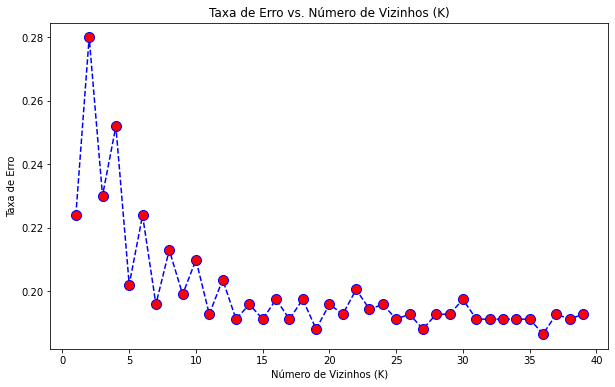

In [15]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn_model = KNeighborsClassifier(n_neighbors=15) 
knn_model.fit(X_train_noisy, y_train)

y_pred = knn_model.predict(X_test_noisy)

print("Matriz de Confusão:\n", confusion_matrix(y_test, y_pred))

accuracy_knn = accuracy_score(y_test, y_pred)
print(f'Acurácia do KNN: {accuracy_knn:.2f}')
print(classification_report(y_test, y_pred))

error_rate = []
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train_noisy, y_train) 
    pred_i = knn.predict(X_test_noisy) 
    error_rate.append(np.mean(pred_i != y_test))

plt.figure(figsize=(10, 6))
plt.plot(range(1, 40), error_rate, color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Taxa de Erro vs. Número de Vizinhos (K)')
plt.xlabel('Número de Vizinhos (K)')
plt.ylabel('Taxa de Erro')
plt.show()


# Explicação do Resultado do Modelo K-Nearest Neighbors (KNN)
##### O modelo **K-Nearest Neighbors (KNN)** atingiu uma acurácia de 81%, o que indica que ele classificou corretamente 81% dos exemplos no conjunto de teste.

- **Precisão**: A precisão para a classe 0 foi de 81%, assim como para a classe 1. Isso significa que, das instâncias que o modelo classificou como classe 0, 81% estavam corretas, e o mesmo ocorre para a classe 1. Essa paridade na precisão sugere que o modelo não favorece uma classe em termos de previsões corretas.

- **Recall**: O recall para a classe 0 foi de 51%, enquanto para a classe 1 foi de 95%. Isso significa que o modelo foi capaz de identificar corretamente 95% das instâncias da classe 1, mas teve dificuldades em detectar a classe 0, com apenas 51% de acertos. Esse recall baixo para a classe 0 indica que o modelo pode não estar tão sensível para essa classe.

- **F1-Score**: O F1-score foi de 0.62 para a classe 0 e de 0.87 para a classe 1. Isso demonstra que o modelo é mais eficaz em capturar a classe 1 de forma equilibrada, mas a combinação de precisão e recall para a classe 0 é inferior.

- **Matriz de Confusão**: A matriz de confusão indica que o modelo classifica corretamente a maioria das instâncias da classe 1, mas possui uma quantidade significativa de falsos negativos na classe 0. Esse padrão pode sinalizar que o modelo é melhor para capturar a classe 1, embora precise de ajustes para melhorar a identificação da classe 0.

- **Análise da Taxa de Erro**: A análise da taxa de erro em função do número de vizinhos (K) mostra como o desempenho do modelo KNN varia à medida que o número de vizinhos muda. Esse gráfico ajuda a identificar o valor ideal de K, onde a taxa de erro é minimizada. Isso permite um ajuste mais eficaz do modelo, equilibrando a capacidade de generalização com a precisão.

# Support Vector Regression (SVR)

In [16]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

svr_model = SVR(kernel='rbf', C=1.0, epsilon=0.1) 
svr_model.fit(X_train_scaled, y_train)

y_pred = svr_model.predict(X_test_scaled)

tolerance = 0.1

accuracy_within_tolerance = sum(abs(y_test - y_pred) <= tolerance) / len(y_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Acurácia dentro da tolerância de {tolerance * 100}%: {accuracy_within_tolerance * 100:.2f}%")
print(f"Erro Médio Quadrático (MSE): {mse}")
print(f"Coeficiente de Determinação (R²): {r2}")

Acurácia dentro da tolerância de 10.0%: 76.36%
Erro Médio Quadrático (MSE): 0.009760644859833707
Coeficiente de Determinação (R²): 0.9544522702409325


# Explicação do Resultado do Modelo Support Vector Regression (SVR)

##### O modelo **Support Vector Regression (SVR)** obteve uma acurácia dentro da tolerância de 10% de 76.36%, indicando que ele conseguiu prever valores com um erro máximo de 10% em 76.36% dos exemplos no conjunto de teste.

- **Acurácia dentro da Tolerância**: A acurácia de 76.36% mostra que o modelo SVR foi capaz de prever o valor alvo com uma precisão dentro de 10% da realidade na maioria dos casos. Esse nível de acurácia indica que o modelo é confiável para fazer previsões aproximadas dentro dessa margem.

- **Erro Médio Quadrático (MSE)**: O MSE foi de 0.0098, um valor baixo que sugere que as previsões estão, em média, próximas dos valores reais. Esse resultado reflete que o modelo SVR consegue minimizar erros de grande magnitude, mantendo uma boa precisão média.

- **Coeficiente de Determinação (R²)**: O R² foi de 0.95, o que indica que o modelo explica cerca de 95% da variabilidade nos dados de teste. Esse valor próximo de 1 sugere que o modelo SVR é muito eficaz em capturar o padrão geral dos dados, o que é positivo para previsões precisas e generalizadas.

# Árvore de Decisão

Acurácia da Árvore de Decisão: 0.83
Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.77      0.66      0.71       200
           1       0.86      0.91      0.88       443

    accuracy                           0.83       643
   macro avg       0.81      0.78      0.80       643
weighted avg       0.83      0.83      0.83       643



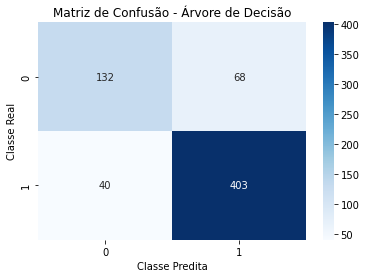

In [17]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_noisy)
X_test_scaled = scaler.transform(X_test_noisy)

arv_model = DecisionTreeClassifier(max_depth=3, random_state=42)
arv_model.fit(X_train_scaled, y_train)

y_pred = arv_model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)

print(f"Acurácia da Árvore de Decisão: {accuracy:.2f}")
print("Relatório de Classificação:\n", classification_report(y_test, y_pred))

conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title('Matriz de Confusão - Árvore de Decisão')
plt.ylabel('Classe Real')
plt.xlabel('Classe Predita')
plt.show()


# Explicação do Resultado do Modelo Árvore de Decisão

##### O modelo **Árvore de Decisão** obteve uma acurácia de 83%, o que significa que ele foi capaz de classificar corretamente 83% dos exemplos no conjunto de teste.

- **Precisão**: Para a classe 0, o modelo alcançou uma precisão de 77%, enquanto para a classe 1, a precisão foi de 86%. Isso indica que o modelo teve uma taxa de acerto de 77% para as instâncias da classe 0 e 86% para as da classe 1, sendo ligeiramente mais preciso para a classe 1.

- **Recall**: O modelo alcançou um recall de 66% para a classe 0 e 91% para a classe 1, o que demonstra uma alta sensibilidade para detectar a classe 1. Esse recall mais elevado para a classe 1 pode ser vantajoso em cenários em que é preferível minimizar os falsos negativos.

- **F1-Score**: O F1-score foi de 0.71 para a classe 0 e de 0.88 para a classe 1, mostrando que o modelo teve um desempenho geral mais forte para a classe 1 em termos de equilíbrio entre precisão e recall.

- **Matriz de Confusão**: A matriz de confusão revela que o modelo apresenta uma boa taxa de acerto para a classe 1, mas com alguns falsos negativos e falsos positivos para a classe 0. Isso indica que, embora o modelo seja eficaz para identificar a classe 1, ele pode ainda ser aprimorado para aumentar a precisão na classe 0.

# Predição da Popularidade de Filmes e Séries

Predição de Filmes:
                           name  pred_popularidade
0                Heart of Stone                  1
1  Johnny English Strikes Again                  0
2                          Hunt                  1
3                    Safe House                  1
4                    Commitment                  1
5                        Switch                  1
6   Yaksha: Ruthless Operations                  1
7             Codename: Tiranga                  1
8                 Atomic Blonde                  1
9     Jack Ryan: Shadow Recruit                  0

Nulos na predição de popularidade de filmes: 0


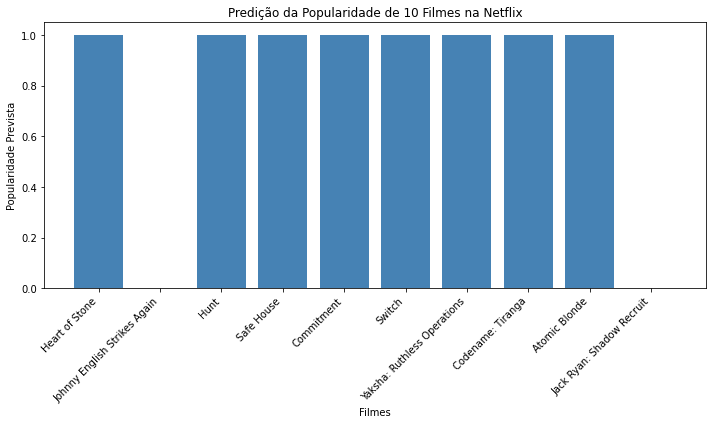

Predição de Séries:
                       name  pred_popularidade
404               Big Mouth                  1
405          Disenchantment                  1
406    Love, Death & Robots                  1
407              Inside Job                  1
408                  Arcane                  1
409     The Midnight Gospel                  1
410             Paradise PD                  1
411         F is for Family                  1
412         BoJack Horseman                  1
413  Pacific Rim: The Black                  1

Nulos na predição de popularidade de séries: 0


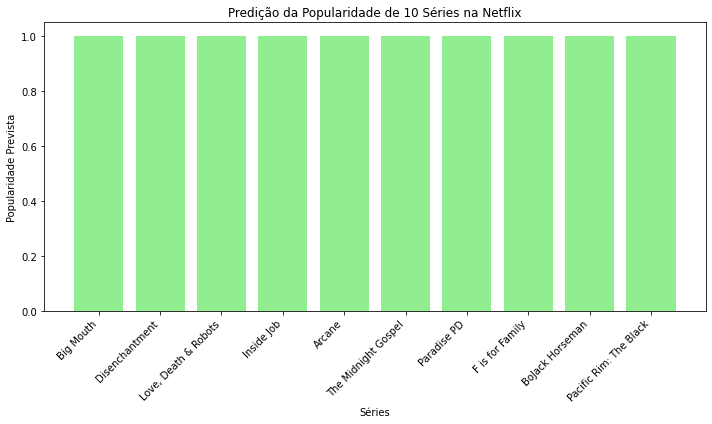

In [18]:
nome_coluna_titulo = 'title' if 'title' in data_netflix_copy.columns else 'name'

top_10_filmes = data_netflix_copy[data_netflix_copy['type'] == 'Movie'].head(10)
top_10_series = data_netflix_copy[data_netflix_copy['type'] == 'TV Show'].head(10)

top_10_filmes['pred_popularidade'] = rf_model.predict(top_10_filmes[['genres', 'year', 'time', 'rating']])
top_10_series['pred_popularidade'] = rf_model.predict(top_10_series[['genres', 'year', 'time', 'rating']])

print("Predição de Filmes:")
print(top_10_filmes[[nome_coluna_titulo, 'pred_popularidade']])
print("\nNulos na predição de popularidade de filmes:", top_10_filmes['pred_popularidade'].isnull().sum())

plt.figure(figsize=(10, 6))
plt.bar(top_10_filmes[nome_coluna_titulo], top_10_filmes['pred_popularidade'], color='steelblue')
plt.xlabel('Filmes')
plt.ylabel('Popularidade Prevista')
plt.title('Predição da Popularidade de 10 Filmes na Netflix')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

print("Predição de Séries:")
print(top_10_series[[nome_coluna_titulo, 'pred_popularidade']])
print("\nNulos na predição de popularidade de séries:", top_10_series['pred_popularidade'].isnull().sum())

plt.figure(figsize=(10, 6))
plt.bar(top_10_series[nome_coluna_titulo], top_10_series['pred_popularidade'], color='lightgreen')
plt.xlabel('Séries')
plt.ylabel('Popularidade Prevista')
plt.title('Predição da Popularidade de 10 Séries na Netflix')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Conclusão

A avaliação dos cinco modelos — Regressão Logística, Random Forest, K-Nearest Neighbors (KNN), Support Vector Regression (SVR) e Árvore de Decisão — forneceu uma visão abrangente do desempenho e das características de cada um:

- **Regressão Logística** e **Árvore de Decisão** apresentaram uma acurácia de 83%, demonstrando uma boa capacidade de classificação geral. Ambos mostraram alta precisão na classe 1, mas poderiam melhorar na identificação da classe 0. São modelos eficientes para problemas de classificação binária.

- **Random Forest**, também com acurácia de 83%, teve um desempenho equilibrado nas duas classes, sendo um dos mais robustos para classificação em nosso conjunto de dados. Sua capacidade de lidar bem com variáveis múltiplas e de fornecer insights sobre a importância das variáveis faz dele uma escolha sólida para problemas de classificação complexos.

- **K-Nearest Neighbors (KNN)** obteve uma acurácia ligeiramente inferior, de 81%, destacando-se pela simplicidade do método. Apesar de menor precisão na classe 0, teve ótimo desempenho na classe 1. Sua eficácia é mais evidente em contextos com padrões bem definidos em torno de pontos próximos, e sua performance pode variar conforme o número de vizinhos utilizados.

- **Support Vector Regression (SVR)** foi o modelo mais adequado para previsões contínuas, apresentando um R² de 0,95 e uma acurácia dentro da tolerância de 10,0% de 76,36%. Esses resultados indicam alta precisão nas estimativas de valores contínuos, tornando o SVR uma excelente escolha para problemas de regressão.

Em resumo, a escolha do modelo mais adequado depende do tipo de tarefa. Para classificação, **Random Forest** se destacou pela robustez e pelo equilíbrio entre as classes. Para previsões de valores contínuos, o SVR foi o modelo com melhor desempenho. Cada modelo possui seus pontos fortes, e a seleção ideal depende dos objetivos específicos do projeto e do tipo de variável alvo.